In [222]:
import numpy as np #import the required libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [223]:
dataset = pd.read_csv('/content/kidney_disease.csv') #load your dataset

In [224]:
lbl = LabelEncoder()  #converting categorical data from satisfaction and gender columns to numerical data
cols = ['rbc', 'pc', 'pcc', 'ba', 'htn',	'dm',	'cad',	'appet',	'pe',	'ane']
dataset[cols] = dataset[cols].apply(lbl.fit_transform)

In [225]:
dataset.isnull().sum() #check for null values in the dataset

id                 0
age                9
bp                12
sg                47
al                46
su                49
rbc                0
pc                 0
pcc                0
ba                 0
bgr               44
bu                19
sc                17
sod               87
pot               88
hemo              52
htn                0
dm                 0
cad                0
appet              0
pe                 0
ane                0
classification     0
dtype: int64

In [226]:
data= dataset.fillna(method= 'bfill', axis = 0) #fill null values in dataset
#I have used bfill method so that we do not drop any columns and loose data. If we use ffill method, we can notice that it does not fill all the null values.

In [227]:
data.isnull().sum() #recheck for null values in the dataset

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [228]:
data = data.drop(['id'], axis = 1) #as the id is just the s.no, you can drop this column

In [229]:
print(np.mean(data)) #check if your data is normalized - mean = 0, std dev = 1
print(np.std(data))

age                51.580000
bp                 76.350000
sg                  1.017175
al                  1.072500
su                  0.495000
rbc                 1.262500
pc                  0.972500
pcc                 0.125000
ba                  0.075000
bgr               147.585000
bu                 57.328000
sc                  3.058125
sod               136.743750
pot                 4.569000
hemo               12.388500
htn                 0.377500
dm                  3.310000
cad                 1.090000
appet               0.210000
pe                  0.195000
ane                 0.155000
classification      0.625000
dtype: float64
age               17.080064
bp                13.717780
sg                 0.005692
al                 1.375589
su                 1.129148
rbc                0.654671
pc                 0.593080
pcc                0.359687
ba                 0.298957
bgr               79.345559
bu                50.187085
sc                 5.651095
sod        

In [230]:
data = data.drop(['classification'], axis = 1) #PCA is unsupervised learning, hence drop the 'diagnosis' label
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,121.0,36.0,1.2,111.0,2.5,15.4,1,4,1,0,0,0
1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,423.0,18.0,0.8,111.0,2.5,11.3,0,3,1,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,111.0,2.5,9.6,0,4,1,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,1,3,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,142.0,3.2,11.6,0,3,1,0,0,0


In [231]:
from sklearn.preprocessing import StandardScaler
data = StandardScaler().fit_transform(data)  #always normalize your data before PCA

In [232]:
print(np.mean(data)) #check if your data is normalized - mean = 0, std dev = 1
print(np.std(data))

1.928615997063129e-16
1.0


In [235]:
pca = PCA(n_components=2) #perform PCA with 2 principal components
data_pca = pca.fit_transform(data)

In [236]:
pca.components_

array([[ 0.16987196,  0.15733152, -0.26241157,  0.31868213,  0.20613083,
         0.00375354, -0.10685735,  0.12983591,  0.07604228,  0.21203672,
         0.29358105,  0.22544921, -0.21047136,  0.08144146, -0.34671626,
         0.32195497,  0.24990798,  0.16589737,  0.22127415,  0.23031845,
         0.22505617],
       [-0.21599149, -0.08628369,  0.0256536 ,  0.18231194, -0.22163297,
        -0.4472801 , -0.4829313 ,  0.38661973,  0.38950797, -0.15036286,
         0.0898889 , -0.03876661,  0.0611342 ,  0.03505176,  0.00711199,
        -0.16380211, -0.20128578, -0.05727793,  0.07226956,  0.11033138,
         0.05639391]])

In [237]:
data_after_pca = pd.DataFrame(data = data_pca, columns = ['PC1', 'PC2']) #visualize your data after PCA
data_after_pca.head()

,PC1,PC2
0,-0.117517,-1.324886
1,-0.065360,-0.160390
2,3.384635,-1.221802
3,3.703448,2.598164
4,-0.736035,0.277164


In [238]:
print(pca.explained_variance_ratio_) #find out how much variance is explained by each principal component
#in our model, a total of 33.5% varaince is explained by PC1 and PC2

[0.24375062 0.09212239]


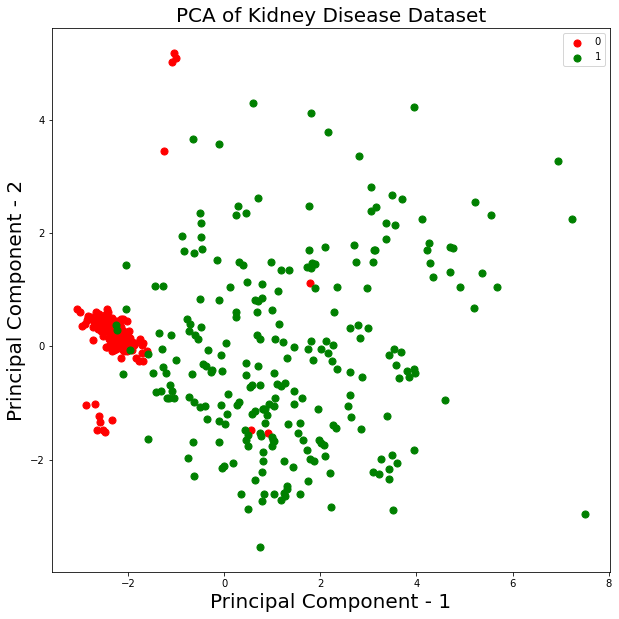

In [239]:
plt.figure(figsize=(10,10)) #visualize your PCA. From the graph for PC1= -2 and PC2 = 0, the patient does not have a kidney disease
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("PCA of Kidney Disease Dataset",fontsize=20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = dataset['classification'] == target
    plt.scatter(data_after_pca.loc[indicesToKeep, 'PC1']
               , data_after_pca.loc[indicesToKeep, 'PC2'], c = color, s = 50)

plt.legend(targets)

In [243]:
pca = PCA(n_components=0.95) #perform PCA with 95% variance
data_pca = pca.fit_transform(data)

In [244]:
pca.n_components_ #a total of 18 principal components are required to retain 95% of the data

18